In [855]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from scipy.spatial.distance import pdist
%matplotlib inline 

In [856]:
df = pd.read_excel(r'C:\Users\Yuri\Desktop\Digital_Line\for_clustering.xlsx')

D:\IT\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Exploratoty Data Analysis

In [857]:
df.head()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,0.081007,1,1,60,12,963.01,1,1,2,2
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,0.036766,1,0,91,15,1534.69,1,1,2,2
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,0.112974,1,1,13,2,1514.48,1,1,3,3
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,0.027406,1,0,68,35,1872.24,1,1,2,2
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,0.042788,1,1,22,3,557.97,1,1,1,1


In [858]:
df.shape

(27508, 45)

In [859]:
df.isnull().sum()

Id_client                     0
InWeek_amount                 0
InWeek_SKU                    0
Checkinmonth_average          0
Checkamount_mean              0
Count_transac                 0
Total_amount                  0
Total_SKU_qnt                 0
Count_departments             0
Count_shop                    0
Count_city                    0
Tenure                        0
SKU_meanbytransac             0
Amount_last6mnth              0
Check_qntlast6mnth            0
SKU_price_mean                0
Gender                      241
Age                         152
Age_group                   152
Interval_visit                0
Days_pastvisit                0
Cat_householdchem_qnt         0
Cat_householdchem_amount      0
Cat_householdchem_share       0
Cat_careproducts_qnt          0
Cat_careproducts_amount       0
Cat_careproducts_share        0
Cat_toiletries_qnt            0
Cat_toiletries_amount         0
Cat_toiletries_share          0
Cat_healthwellnes_qnt         0
Cat_heal

In [860]:
df = df.dropna(how='any')
#удаляю строки с нулевыми знаениями, так как их количество составляет незначительную часть от всего датасэта

In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27267 entries, 0 to 27507
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id_client                 27267 non-null  int64  
 1   InWeek_amount             27267 non-null  float64
 2   InWeek_SKU                27267 non-null  int64  
 3   Checkinmonth_average      27267 non-null  int64  
 4   Checkamount_mean          27267 non-null  float64
 5   Count_transac             27267 non-null  int64  
 6   Total_amount              27267 non-null  float64
 7   Total_SKU_qnt             27267 non-null  int64  
 8   Count_departments         27267 non-null  int64  
 9   Count_shop                27267 non-null  int64  
 10  Count_city                27267 non-null  int64  
 11  Tenure                    27267 non-null  int64  
 12  SKU_meanbytransac         27267 non-null  int64  
 13  Amount_last6mnth          27267 non-null  float64
 14  Check_

In [862]:
df.describe()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
count,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,...,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000
mean,210554.677412,314.727674,31.429677,2.558844,159.693040,82.136795,9585.634168,762.858547,26.738915,3.857703,...,0.058615,0.999963,0.547585,40.356695,8.388125,936.866392,0.998056,0.921003,2.003741,2.003741
std,121847.905725,144.464143,11.376459,1.195365,111.530519,62.795554,4712.874709,451.270900,4.036792,2.760003,...,0.048948,0.006056,0.497740,23.757077,7.202557,590.731978,0.044046,0.269738,0.776111,0.776111
min,5743.000000,34.474000,2.000000,2.000000,10.239800,4.000000,739.360000,33.000000,7.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,99.000000,0.000000,0.000000,1.000000,1.000000
25%,105584.500000,212.991350,23.000000,2.000000,85.936900,39.000000,5888.720000,431.000000,24.000000,2.000000,...,0.022685,1.000000,0.000000,22.000000,3.000000,447.800000,1.000000,1.000000,1.000000,1.000000
50%,212782.000000,289.203400,31.000000,2.000000,128.850800,66.000000,8808.650000,673.000000,27.000000,3.000000,...,0.047558,1.000000,1.000000,37.000000,6.000000,827.110000,1.000000,1.000000,2.000000,2.000000
75%,309896.500000,385.203400,41.000000,2.000000,199.414400,108.000000,12621.820000,1001.500000,30.000000,5.000000,...,0.081679,1.000000,1.000000,56.000000,11.000000,1330.255000,1.000000,1.000000,3.000000,3.000000
max,830188.000000,2180.013700,51.000000,20.000000,1326.115700,990.000000,22748.390000,5058.000000,38.000000,46.000000,...,0.887302,1.000000,1.000000,180.000000,112.000000,2478.470000,1.000000,1.000000,3.000000,3.000000


In [863]:
df.columns

Index(['Id_client', 'InWeek_amount', 'InWeek_SKU', 'Checkinmonth_average',
       'Checkamount_mean', 'Count_transac', 'Total_amount', 'Total_SKU_qnt',
       'Count_departments', 'Count_shop', 'Count_city', 'Tenure',
       'SKU_meanbytransac', 'Amount_last6mnth', 'Check_qntlast6mnth',
       'SKU_price_mean', 'Gender', 'Age', 'Age_group', 'Interval_visit',
       'Days_pastvisit', 'Cat_householdchem_qnt', 'Cat_householdchem_amount',
       'Cat_householdchem_share', 'Cat_careproducts_qnt',
       'Cat_careproducts_amount', 'Cat_careproducts_share',
       'Cat_toiletries_qnt', 'Cat_toiletries_amount', 'Cat_toiletries_share',
       'Cat_healthwellnes_qnt', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 'Cat_babyprod_qnt', 'Cat_babyprod_amount',
       'Cat_babyprod_share', 'Communication_3month', 'Response_communcation',
       'SKU_LastMonthqnt', 'Checks_LastMonthqnt', 'Amount_LastMonth',
       'Discount', 'Discount_LastMonth', '_SEGMENT_', 'EM_SEGMENT'],
      dtype

# Clustering

In [896]:
col = ['Age', 'Count_transac']
#отбираю столбцы для кластеризации

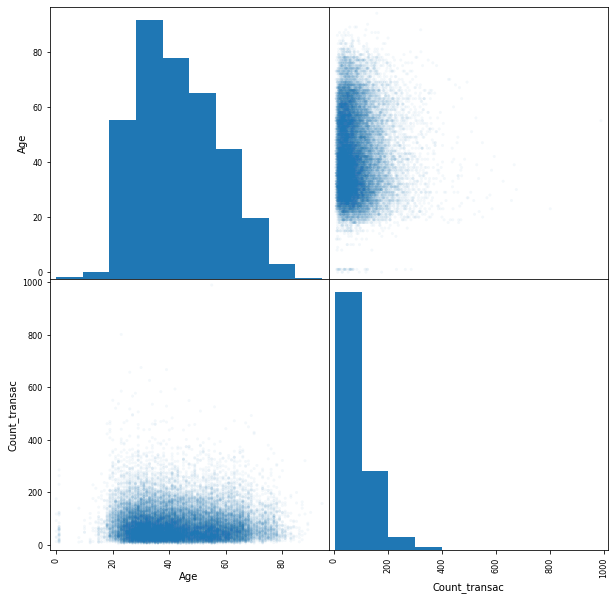

In [865]:
scatter_matrix(df[col], alpha=0.05, figsize=(10, 10));

Перебрав разные столбы из предложенных данных, я заметил, что большинство из них имеет высокую плотность распределения в одной области. При таких распределениях выделить явные кластеры будет непростой задачей. Посмотрим что будет в итоге.

In [897]:
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values) #нормализую данные

In [898]:
data_dist = pdist(dataNorm, 'euclidean') #вычисляю Евклидово расстояние между наборами данных

In [899]:
data_linkage = linkage(data_dist, method='average') #Объединение элементов в кластера и сохранение в отдельной переменной

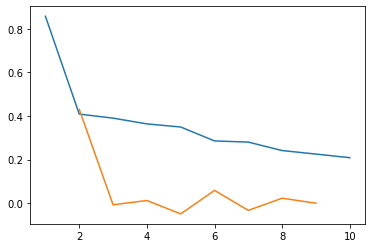

Рекомендованное количество кластеров: 2


In [900]:
#метод локтя
last = data_linkage[-10:, 2] 
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [937]:
nClust=7

In [938]:
# Предположительно, из-за высокой плотности распределения объектов и отсутствующих ярко-выраженных кластеров, метод локтя
# работает не совсем корректно. Адекваные результаты получаются при ручном подборе количтсва сегментаций.
# Возможно, другой метод отработал бы в автоматическом режиму лучше, чем K-means.

In [934]:
clusters=fcluster(data_linkage, nClust, criterion='maxclust') # список с принадлежностью объекта к кластеру

In [935]:
col

['Age', 'Count_transac']

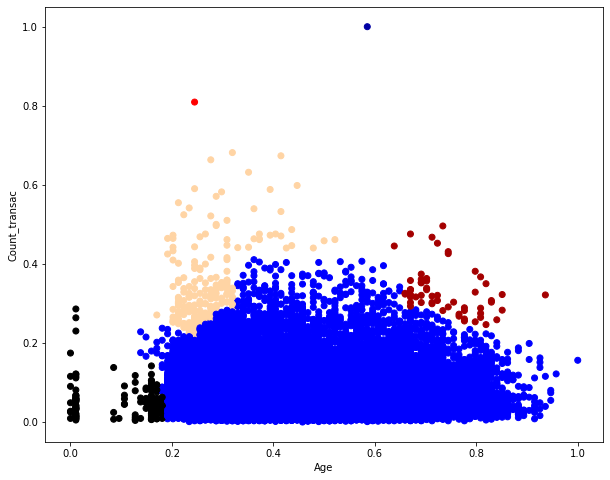

In [936]:
x=0
y=1
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

Получилась интересная сегментация с зависимости от возрастра клиента и количества совешенных им операций

In [884]:
col = ['Count_transac', 'Checkamount_mean']
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)
data_dist = pdist(dataNorm, 'euclidean')
data_linkage = linkage(data_dist, method='average')

In [887]:
nClust=6
clusters=fcluster(data_linkage, nClust, criterion='maxclust')

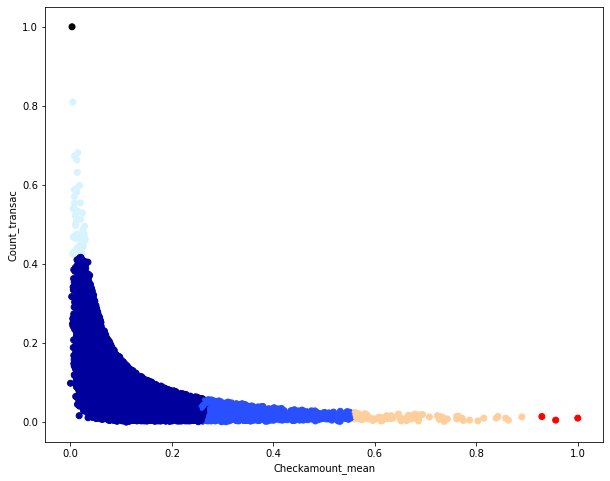

In [888]:
x=1
y=0
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()


Информативная кластеризаяция, показывающая, как количество произведенных транзакций связана со средним чеком.

In [889]:
col = ['Checkamount_mean', 'Interval_visit']
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)
data_dist = pdist(dataNorm, 'euclidean')
data_linkage = linkage(data_dist, method='average')

In [894]:
nClust=6
clusters=fcluster(data_linkage, nClust, criterion='maxclust')

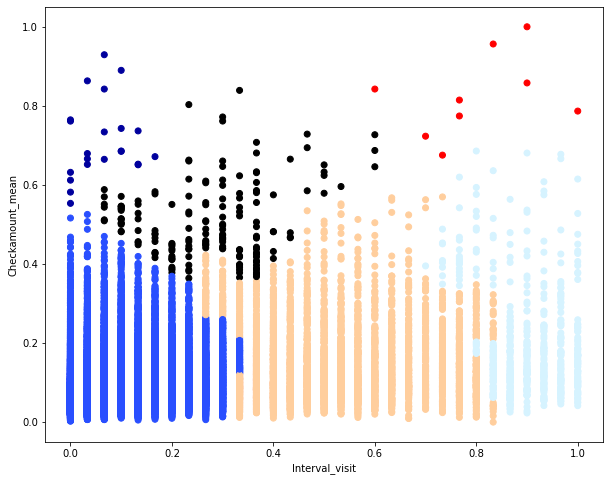

In [895]:
x=1
y=0
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()


И еще одна инфографика, показывающая разбиение клиентов в зависимости от периода их посещения и среднего чека.